# Related Work

Spam detection has been a major area of research in text classification, evolving significantly over the years. Initially, rule-based approaches were common, where systems relied on predefined lists of keywords or regular expressions to filter spam emails.
Naive Bayes classifiers became particularly popular because of their simplicity and effectiveness in handling text data.
Another widely-used approach is Support Vector Machines (SVM), which has shown strong performance in text classification. SVM is capable of handling high-dimensional data and has been used successfully to distinguish between spam and non-spam messages.

# Data Pre-Processing

In [88]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
file_path='/content/Spam_mails.csv'
spam_data=pd.read_csv(file_path)


In [90]:
spam_data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
spam_data.dropna()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Email 339,0,1,1,0,0,0,28,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
339,Email 340,24,12,2,18,2,2,82,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
340,Email 341,3,4,2,2,4,6,22,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
341,Email 342,0,3,1,0,0,1,23,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


In [92]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Columns: 3002 entries, Email No. to Prediction
dtypes: float64(434), int64(2567), object(1)
memory usage: 7.9+ MB


In [93]:
spam_data.isna().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,1
allowing,1
ff,1
dry,1


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Drop the 'Email No.' column
spam_data_cleaned = spam_data.drop(columns=['Email No.'])

# Step 2: Check for missing values
print("Missing values per column:")
print(spam_data_cleaned.isnull().sum().sum())
print("Missing values in 'y':", spam_data_cleaned['Prediction'].isnull().sum())

# No missing values observed in the dataset; no further action required
spam_data_cleaned = spam_data_cleaned.dropna(subset=['Prediction'])

spam_data_cleaned.dropna()

# Step 3: Split features and target
X = spam_data_cleaned.drop(columns=['Prediction'])
y = spam_data_cleaned['Prediction']

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance the dataset using SMOTE if it's imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Output summary
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")


Missing values per column:
434
Missing values in 'y': 1
Training data size: 403 samples
Test data size: 101 samples


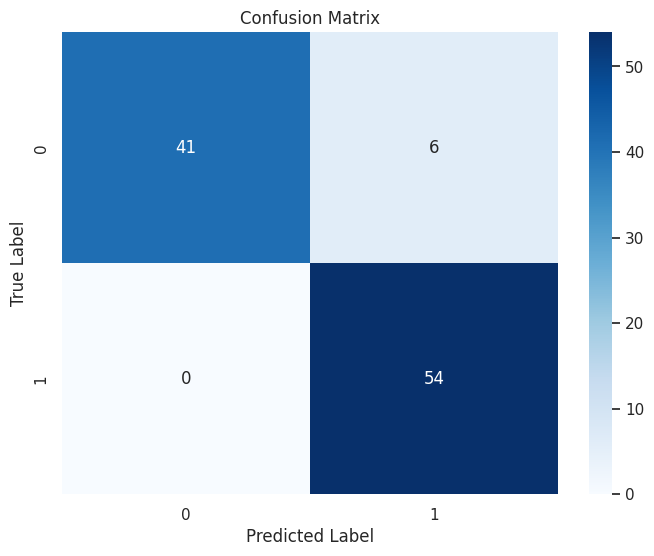

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        47
         1.0       0.90      1.00      0.95        54

    accuracy                           0.94       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.95      0.94      0.94       101

Accuracy Score: 0.94
Top 10 Features by Importance:
      Feature  Importance
1358    learn    0.440291
1536     door    0.378976
172     today    0.312599
2362      den    0.259870
1989  holiday    0.256470
2884    cards    0.209131
1106      fwd    0.208916
675   payment    0.191944
112       ena    0.186227
1885  warning    0.155816


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Optional: Print feature importance for Logistic Regression
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
    print("Top 10 Features by Importance:")
    print(feature_importance.sort_values(by='Importance', ascending=False).head(10))



# Data Visualisation

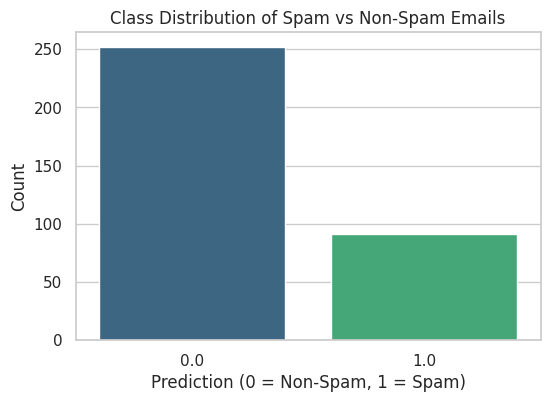

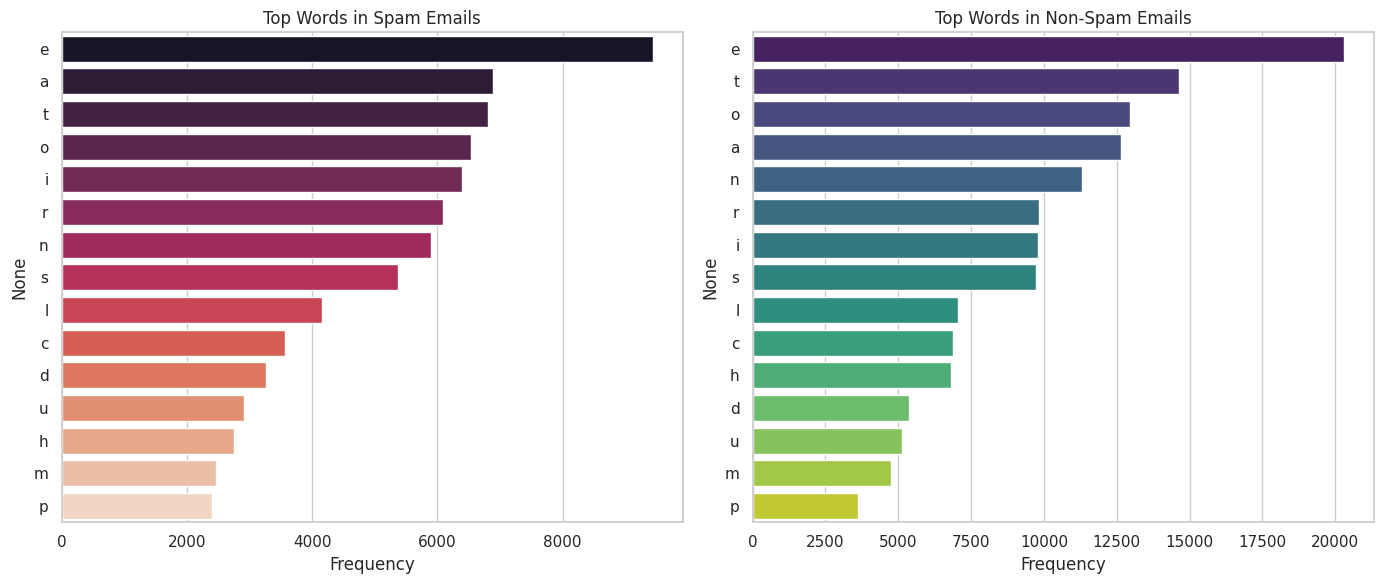

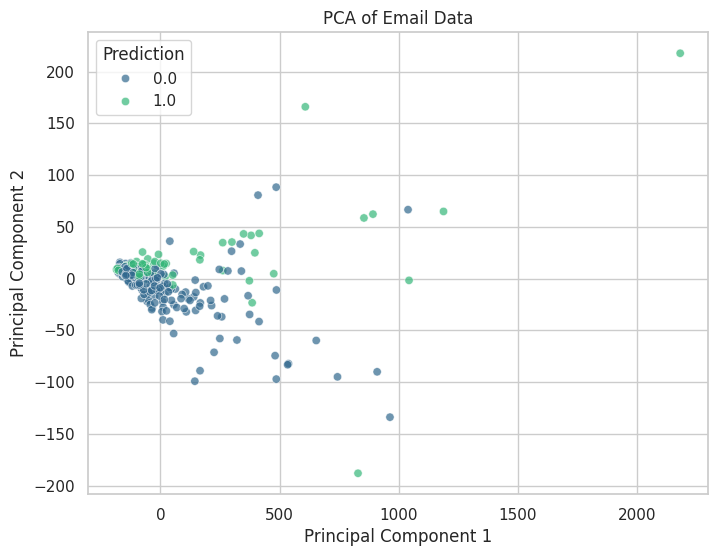

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd # Import pandas for DataFrame operations
from sklearn.impute import SimpleImputer  # Import SimpleImputer


# Setting up the style for the plots
sns.set(style="whitegrid")

# 1. Class Distribution Visualization
def plot_class_distribution(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Prediction', data=data, palette='viridis')
    plt.title("Class Distribution of Spam vs Non-Spam Emails")
    plt.xlabel("Prediction (0 = Non-Spam, 1 = Spam)")
    plt.ylabel("Count")
    plt.show()

# 2. Word Frequency in Spam and Non-Spam Emails
def plot_word_frequencies(data, top_n=15):
    # Separate spam and non-spam emails
    spam_emails = data[data['Prediction'] == 1].drop(columns=['Email No.', 'Prediction'])
    non_spam_emails = data[data['Prediction'] == 0].drop(columns=['Email No.', 'Prediction'])

    # Calculate the sum of each word's occurrence in spam and non-spam emails
    spam_word_freq = spam_emails.sum().sort_values(ascending=False).head(top_n)
    non_spam_word_freq = non_spam_emails.sum().sort_values(ascending=False).head(top_n)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, ax=axes[0], palette="rocket")
    axes[0].set_title("Top Words in Spam Emails")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x=non_spam_word_freq.values, y=non_spam_word_freq.index, ax=axes[1], palette="viridis")
    axes[1].set_title("Top Words in Non-Spam Emails")
    axes[1].set_xlabel("Frequency")

    plt.tight_layout()
    plt.show()

# 3. Dimensionality Reduction Visualization
def plot_pca(data, n_components=2):
    features = data.drop(columns=['Email No.', 'Prediction'])
    labels = data['Prediction']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
    features_imputed = imputer.fit_transform(features)

    # PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_imputed)  # Use imputed features

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Prediction'] = labels.values

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Prediction', data=pca_df, palette='viridis', alpha=0.7)
    plt.title("PCA of Email Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Prediction", loc="best")
    plt.show()

# Assuming 'spam_data' is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd # Import pandas for DataFrame operations
from sklearn.impute import SimpleImputer  # Import SimpleImputer


# Setting up the style for the plots
sns.set(style="whitegrid")

# 1. Class Distribution Visualization
def plot_class_distribution(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Prediction', data=data, palette='viridis')
    plt.title("Class Distribution of Spam vs Non-Spam Emails")
    plt.xlabel("Prediction (0 = Non-Spam, 1 = Spam)")
    plt.ylabel("Count")
    plt.show()

# 2. Word Frequency in Spam and Non-Spam Emails
def plot_word_frequencies(data, top_n=15):
    # Separate spam and non-spam emails
    spam_emails = data[data['Prediction'] == 1].drop(columns=['Email No.', 'Prediction'])
    non_spam_emails = data[data['Prediction'] == 0].drop(columns=['Email No.', 'Prediction'])

    # Calculate the sum of each word's occurrence in spam and non-spam emails
    spam_word_freq = spam_emails.sum().sort_values(ascending=False).head(top_n)
    non_spam_word_freq = non_spam_emails.sum().sort_values(ascending=False).head(top_n)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.barplot(x=spam_word_freq.values, y=spam_word_freq.index, ax=axes[0], palette="rocket")
    axes[0].set_title("Top Words in Spam Emails")
    axes[0].set_xlabel("Frequency")

    sns.barplot(x=non_spam_word_freq.values, y=non_spam_word_freq.index, ax=axes[1], palette="viridis")
    axes[1].set_title("Top Words in Non-Spam Emails")
    axes[1].set_xlabel("Frequency")

    plt.tight_layout()
    plt.show()

# 3. Dimensionality Reduction Visualization
def plot_pca(data, n_components=2):
    features = data.drop(columns=['Email No.', 'Prediction'])
    labels = data['Prediction']

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean') # or strategy='median', 'most_frequent'
    features_imputed = imputer.fit_transform(features)

    # PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features_imputed)  # Use imputed features

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Prediction'] = labels.values

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Prediction', data=pca_df, palette='viridis', alpha=0.7)
    plt.title("PCA of Email Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Prediction", loc="best")
    plt.show()

# Assuming 'spam_data' is your DataFrame
# Execute each visualization function, replacing 'data' with 'spam_data'
plot_class_distribution(spam_data)  # Pass the spam_data DataFrame
plot_word_frequencies(spam_data, top_n=15)
plot_pca(spam_data)
warnings.filterwarnings("ignore")

# Model Training

In [97]:
spam_data.dropna()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Email 339,0,1,1,0,0,0,28,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
339,Email 340,24,12,2,18,2,2,82,5,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
340,Email 341,3,4,2,2,4,6,22,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
341,Email 342,0,3,1,0,0,1,23,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0


In [98]:
spam_data = spam_data.drop(index=343)


In [99]:
rows_with_missing_values = spam_data[spam_data.isnull().any(axis=1)]
count = len(rows_with_missing_values)

print(count)

0


In [100]:
rows_with_missing_values = spam_data[spam_data.isnull().any(axis=1)]

# Print the identified rows
print(rows_with_missing_values)

Empty DataFrame
Columns: [Email No., the, to, ect, and, for, of, a, you, hou, in, on, is, this, enron, i, be, that, will, have, with, your, at, we, s, are, it, by, com, as, from, gas, or, not, me, deal, if, meter, hpl, please, re, e, any, our, corp, can, d, all, has, was, know, need, an, forwarded, new, t, may, up, j, mmbtu, should, do, am, get, out, see, no, there, price, daren, but, been, company, l, these, let, so, would, m, into, xls, farmer, attached, us, information, they, message, day, time, my, one, what, only, http, th, volume, mail, contract, which, month, ...]
Index: []

[0 rows x 3002 columns]


Accuracy: 96.03960396039604

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        47
         1.0       0.93      1.00      0.96        54

    accuracy                           0.96       101
   macro avg       0.97      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



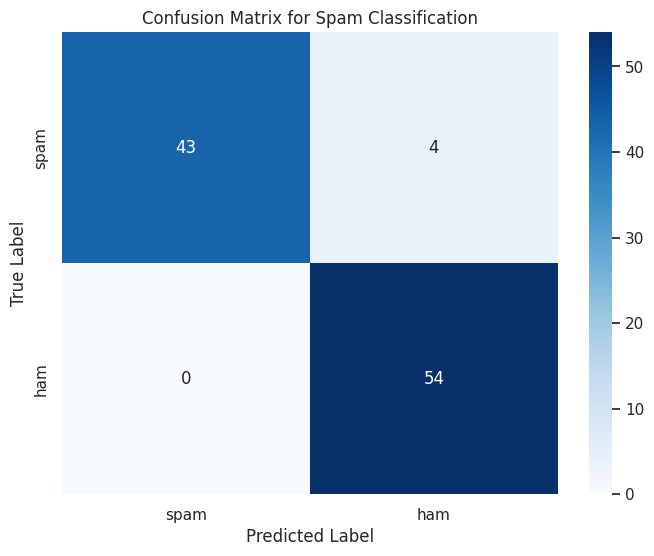

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Load your data (replace with your actual data loading)
spam_data = pd.read_csv("/content/Spam_mails.csv")

# Step 1: Drop the 'Email No.' column
spam_data_cleaned = spam_data.drop(columns=['Email No.'])

# Step 2: Check for missing values and handle them
missing_value_index = spam_data_cleaned.isnull().any(axis=1)
missing_value_row = spam_data_cleaned[missing_value_index]

# Decide on the best course of action (e.g., drop or impute)
# For example, to drop the row:
spam_data_cleaned = spam_data_cleaned.dropna()

# Step 3: Split features and target
X = spam_data_cleaned.drop(columns=['Prediction'])
y = spam_data_cleaned['Prediction']

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance the dataset using SMOTE if it's imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (adjust metrics as needed)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
labels = ['spam', 'ham']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['spam', 'ham']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Spam Classification')
plt.show()


Accuracy: 96.03960396039604

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        47
         1.0       0.93      1.00      0.96        54

    accuracy                           0.96       101
   macro avg       0.97      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101



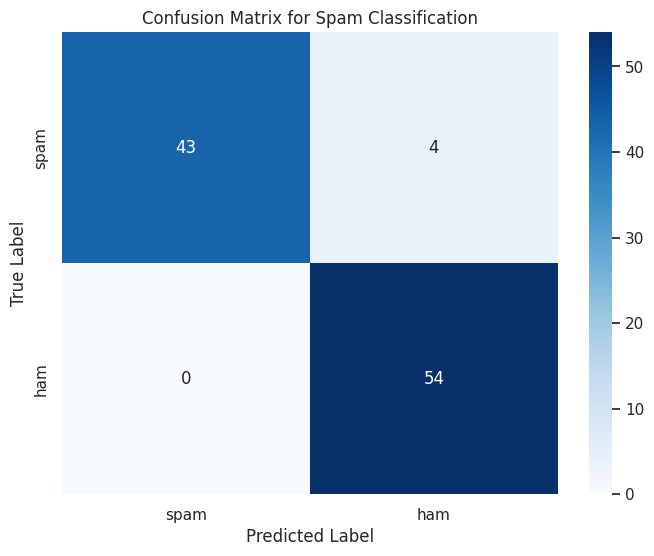

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Load your data (replace with your actual data loading)
spam_data = pd.read_csv("/content/Spam_mails.csv")

# Step 1: Drop the 'Email No.' column
spam_data_cleaned = spam_data.drop(columns=['Email No.'])

# Step 2: Check for missing values and handle them
missing_value_index = spam_data_cleaned.isnull().any(axis=1)
missing_value_row = spam_data_cleaned[missing_value_index]

# Decide on the best course of action (e.g., drop or impute)
# For example, to drop the row:
spam_data_cleaned = spam_data_cleaned.dropna()

# Step 3: Split features and target
X = spam_data_cleaned.drop(columns=['Prediction'])
y = spam_data_cleaned['Prediction']

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance the dataset using SMOTE if it's imbalanced
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (adjust metrics as needed)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
labels = ['spam', 'ham']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['spam', 'ham']

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Spam Classification')
plt.show()


As model 1 got more accuracy, we will be using model 1 for prediction purposes.


# Model Selection

Predicting the result using selected model.

In [104]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the dataset to get the feature list and retrain the model
data = pd.read_csv('/content/Spam_mails.csv')
X = data.drop(columns=['Email No.', 'Prediction'])
y = data['Prediction']

# Check for and handle missing values in either X or y
X.dropna(inplace=True)  # Remove rows with missing values in X
y = y[X.index]          # Align y with the remaining rows in X


# Train the Random Forest Classifier as before
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Initialize CountVectorizer with training vocabulary
vectorizer = CountVectorizer(vocabulary=X.columns)

def predict_email(email_text):
    # Step 1: Transform the input email text to word counts
    email_counts = vectorizer.transform([email_text])
    email_counts_df = pd.DataFrame(email_counts.toarray(), columns=X.columns)

    # Step 2: Predict using the trained model
    prediction = model.predict(email_counts_df)[0]

    # Step 3: Return the prediction result
    if prediction == 1:
        return "Spam"
    else:
        return "Not Spam"

# Example usage
email_text = input("Enter the email sample: ")
print(f"Prediction: {predict_email(email_text)}")

Enter the email sample: congratulations nigga
Prediction: Spam


In [119]:
# First train your model, then save it:
import pickle

# Save the model with proper error handling
try:
    with open('spam_model.pkl', 'wb') as f:  # Note: 'wb' for write binary
        pickle.dump(model, f)
    print("Model saved successfully!")

    with open('vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    print("Vectorizer saved successfully!")
except Exception as e:
    print(f"Error saving files: {e}")

Model saved successfully!
Vectorizer saved successfully!
